In [94]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.io.json import json_normalize
import json

### Part 1 

In [2]:
df=pd.read_json('/Users/dasha/Downloads/ultimate_challenge 2/logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df['Count']=1
df.set_index('login_time',inplace=True)
df=df.resample('15Min').count()
df.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


It seems that the logins seem to rise during the months of March and April 

Text(0.5,1,'Login Counts by 15 min intervals')

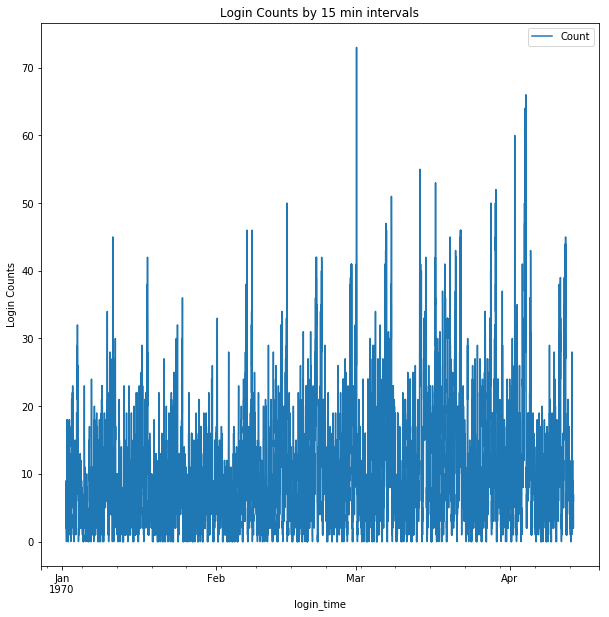

In [5]:
df.plot(figsize=(10,10))
plt.ylabel('Login Counts')
plt.title('Login Counts by 15 min intervals')

THe week'y mean data confirms this observation 

Text(0.5,1,'Weekly Mean Login Counts')

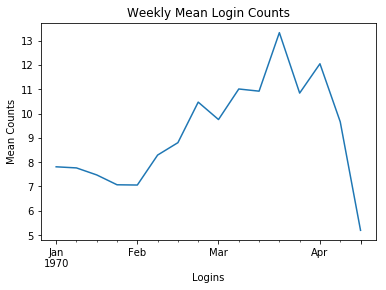

In [6]:
df['Count'].resample('W').mean().plot()
plt.xlabel('Logins')
plt.ylabel('Mean Counts')
plt.title('Weekly Mean Login Counts')

Daily data portrays the fact that the the logins spike during the middle of the week and decline at the end of the week

Text(0.5,1,'Daily Mean Login Counts')

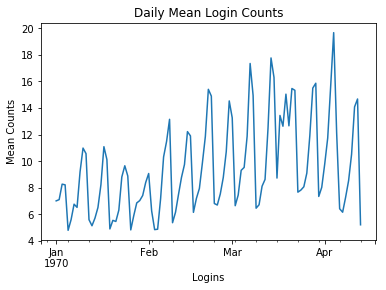

In [7]:
df['Count'].resample('D').mean().plot()
plt.xlabel('Logins')
plt.ylabel('Mean Counts')
plt.title('Daily Mean Login Counts')

### Part 3

In [8]:
with open('/Users/dasha/Downloads/ultimate_challenge 3/ultimate_data_challenge.json') as file: 
    data=json.load(file)
df2=pd.DataFrame(data)

In [9]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [41]:
df2=df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


Text(0,0.5,'Number of Trips')

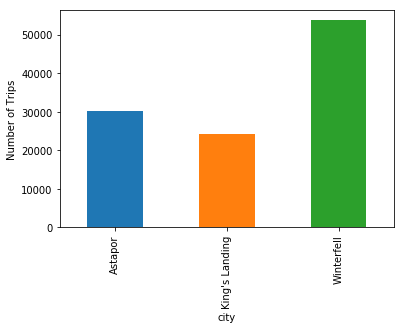

In [69]:
df2.groupby('city')['trips_in_first_30_days'].sum().plot(kind='bar')
plt.ylabel('Number of Trips')

In [56]:
df2['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

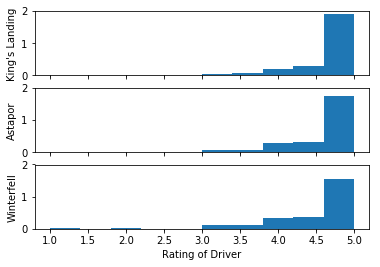

In [60]:
cities=df2['city'].unique().tolist()
fig,axes=plt.subplots(3,1,sharex='col',sharey='col')
for idx,city in enumerate(cities): 
    plot=df2[df2['city']==city]['avg_rating_of_driver'].plot(kind='hist',ax=axes[idx],density=True)
    plt.xlabel('Rating of Driver')
    plot.set_ylabel(cities[idx])

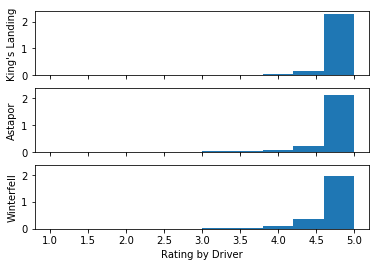

In [79]:
fig,axes=plt.subplots(3,1,sharex='col',sharey='col')
for idx,city in enumerate(cities): 
    plot=df2[df2['city']==city]['avg_rating_by_driver'].plot(kind='hist',ax=axes[idx],density=True)
    plt.xlabel('Rating by Driver')
    plot.set_ylabel(cities[idx])


Text(0,0.5,'Average Number of Trips')

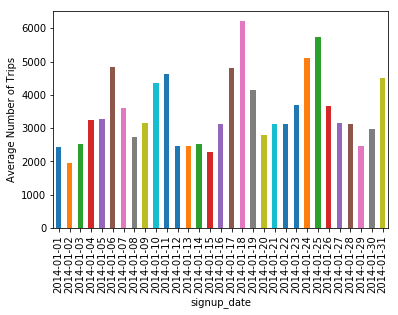

In [72]:
df2.groupby('signup_date')['trips_in_first_30_days'].sum().plot(kind='bar')
plt.ylabel('Average Number of Trips')

In [92]:
df_last_trip=df2.groupby(['last_trip_date','ultimate_black_user'])['trips_in_first_30_days'].sum().to_frame()
df_last_trip.reset_index(inplace=True)
df_last_trip.head()

,last_trip_date,ultimate_black_user,trips_in_first_30_days
0,2014-01-01,False,66
1,2014-01-01,True,13
2,2014-01-02,False,118
3,2014-01-02,True,44
4,2014-01-03,False,104


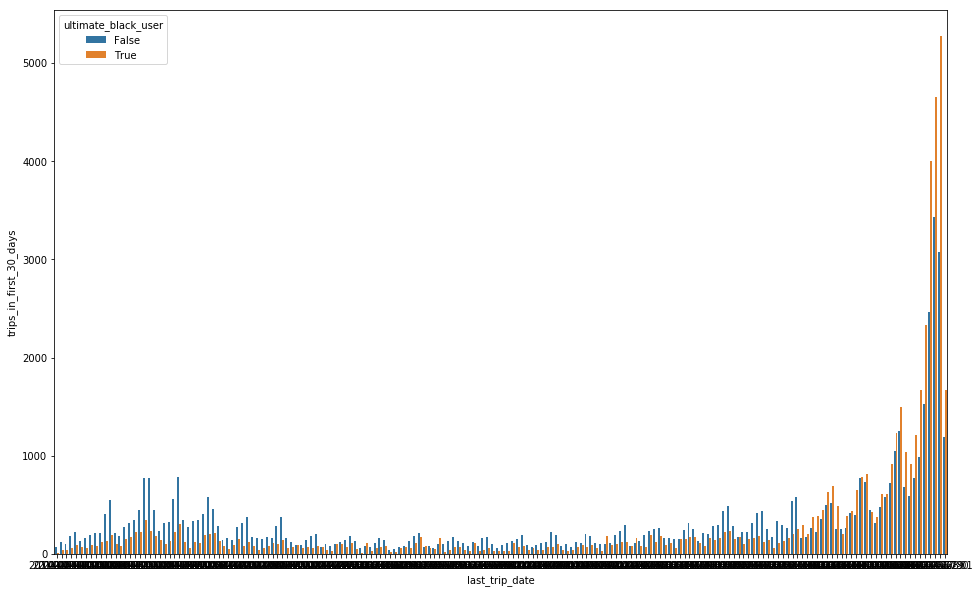

In [99]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x='last_trip_date',y='trips_in_first_30_days',data=df_last_trip,hue='ultimate_black_user')

Text(0,0.5,'Number of Trips')

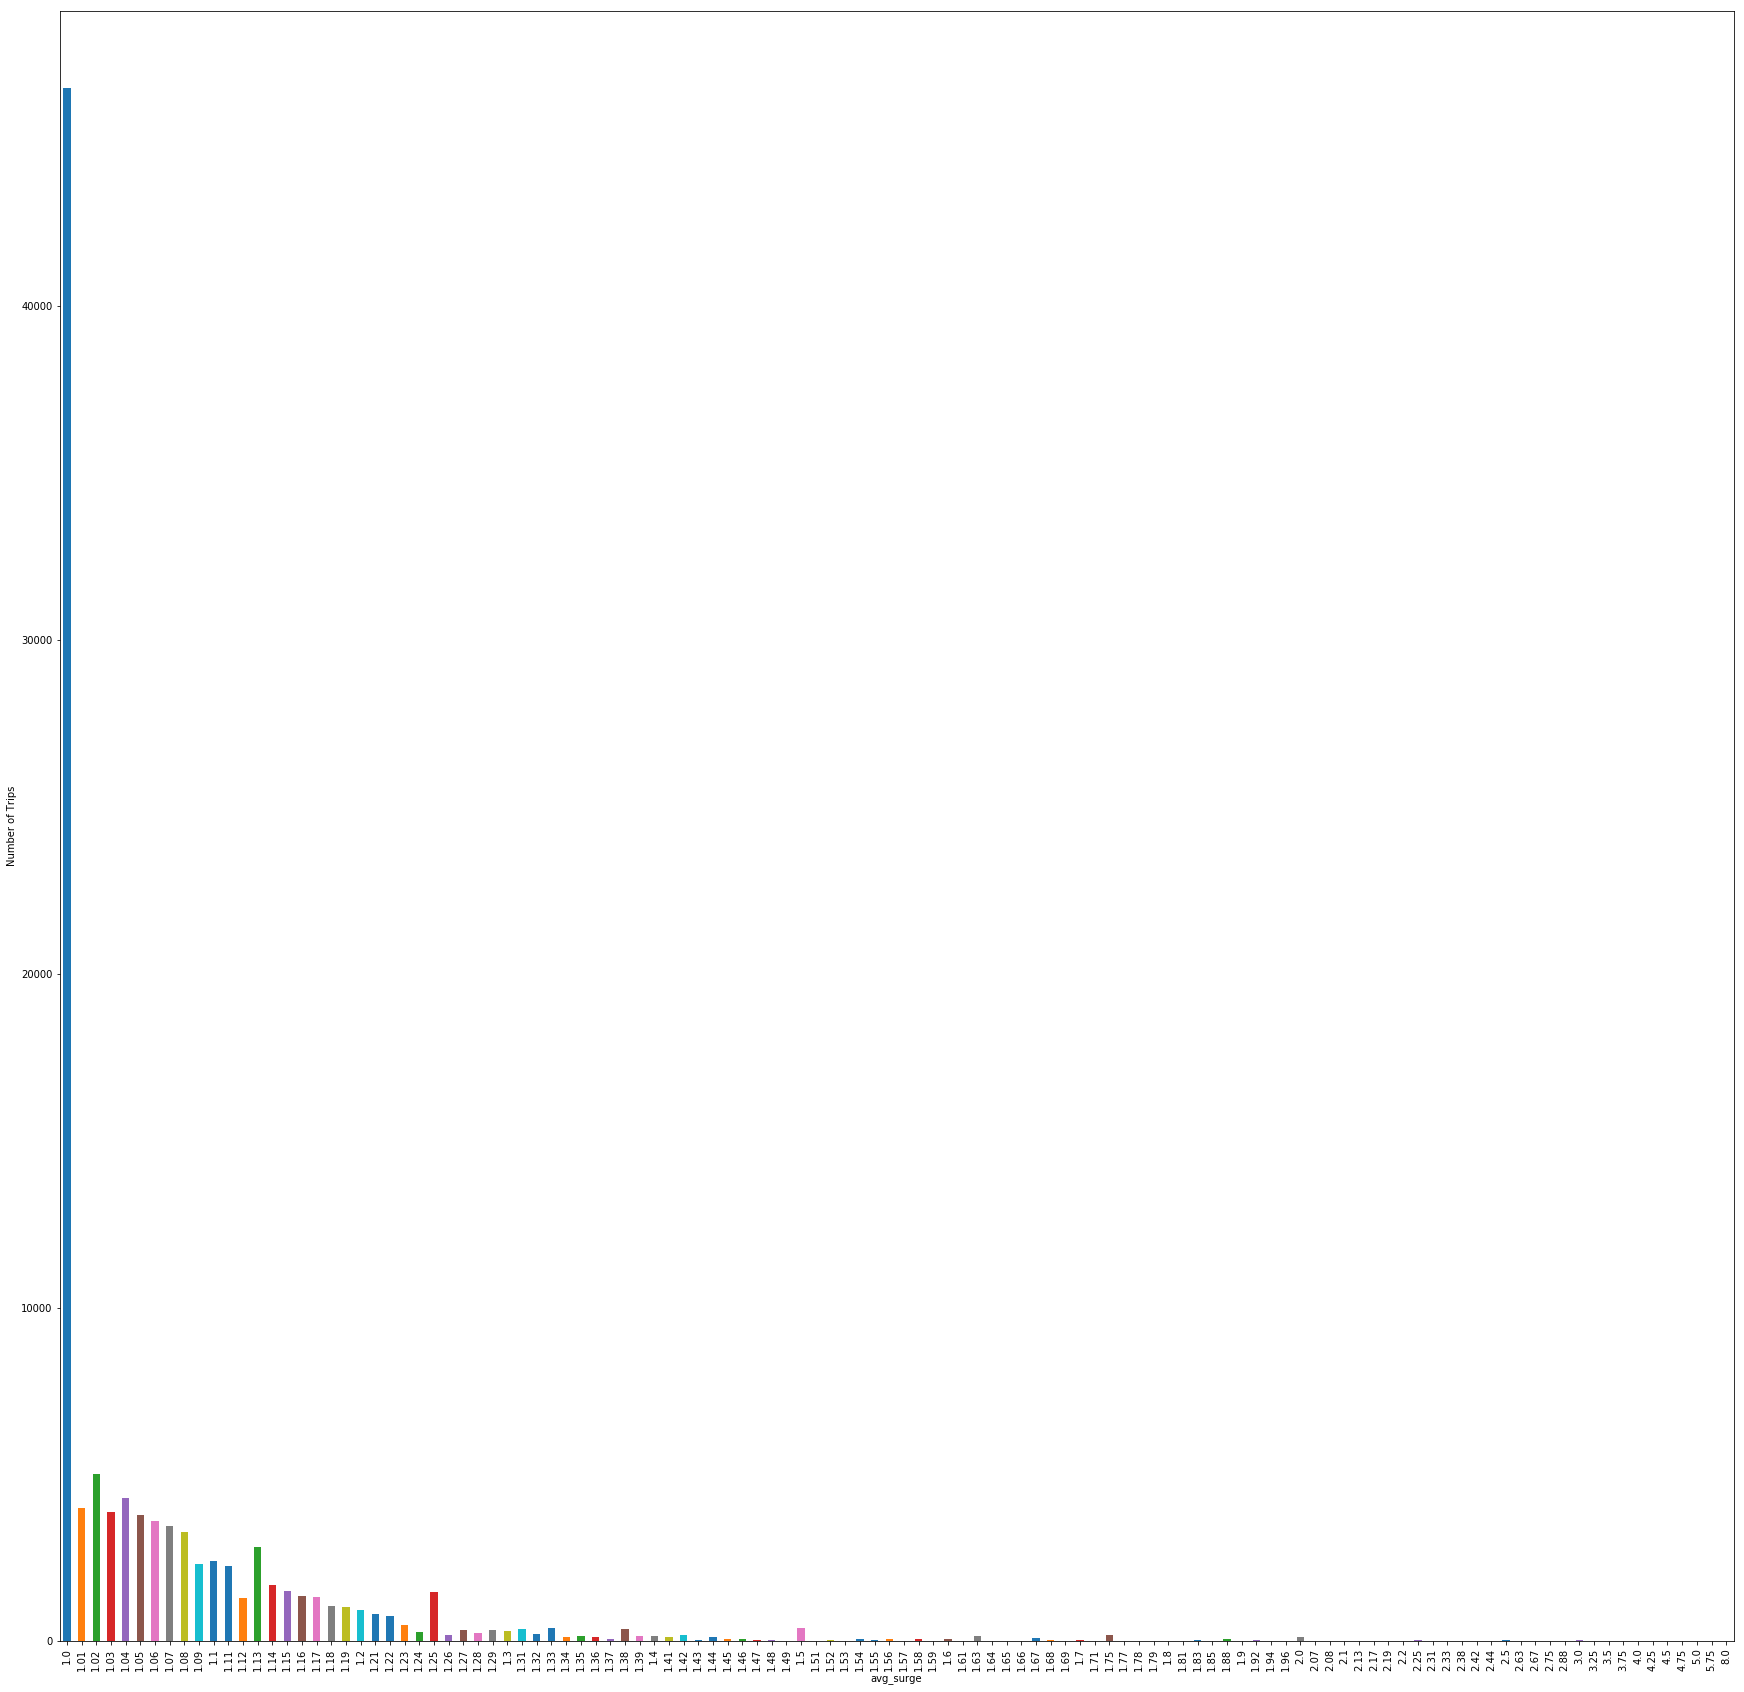

In [77]:
df2.groupby('avg_surge')['trips_in_first_30_days'].sum().plot(kind='bar',figsize=(30,30))
plt.ylabel('Number of Trips')